# Part 2

## Using auto-Sklearn

auto-sklearn frees a machine learning user from algorithm selection and hyperparameter tuning. It leverages recent advantages in Bayesian optimization, meta-learning and ensemble construction. Learn more about the technology behind auto-sklearn by reading our paper published at [NeurIPS 2015](https://proceedings.neurips.cc/paper_files/paper/2015/file/11d0e6287202fced83f79975ec59a3a6-Paper.pdf).

In [ ]:
!sudo apt-get install build-essential swig
!pip install auto-sklearn

In [ ]:
!pip install -U scikit-learn

In [ ]:
#!pip install --force-reinstall scipy==1.6

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X = pd.read_csv('X.csv')
Y = pd.read_csv('Y.csv')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

X_train=X_train.values

Y_train=Y_train.values

X_test=X_test.values

Y_test=Y_test.values

scaler=StandardScaler()

scaler.fit(X_train)

#normalize the features in the training set
X_train_s = scaler.transform(X_train)
#normalize the features in the test set
X_test_s = scaler.transform(X_test)

In [ ]:
import autosklearn.regression

automl = autosklearn.regression.AutoSklearnRegressor(time_left_for_this_task=60*30, per_run_time_limit=35, tmp_folder="/tmp/autosklearn_regression_example_tmp")

automl.fit(X_train_s,Y_train)

[WARNING] [2023-05-04 20:34:33,546:Client-EnsembleBuilder] No runs were available to build an ensemble from


AutoSklearnRegressor(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                     per_run_time_limit=35, time_left_for_this_task=1800,
                     tmp_folder='/tmp/autosklearn_regression_example_tmp')

# Training Results:

In [ ]:
from sklearn.metrics import r2_score

Text(0.5, 1.0, 'MSE=113.83030557470433, MAE=8.581428950602625, R2=0.7341619217989361')

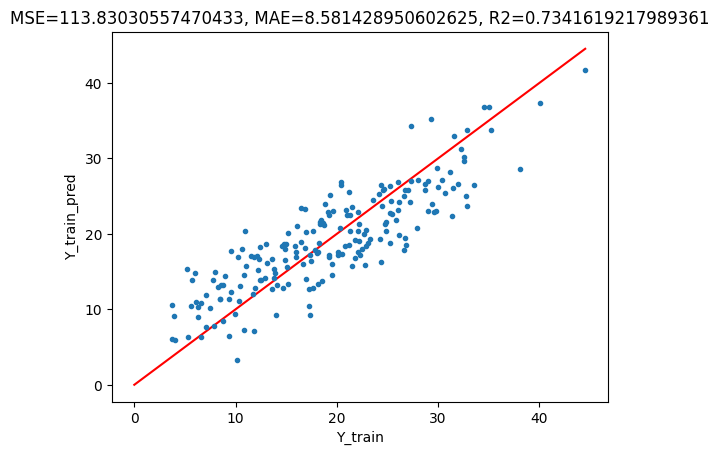

In [ ]:
Y_train_pred = automl.predict(X_train_s)

MSE = np.mean((Y_train - Y_train_pred)**2)
MAE = np.mean(np.abs(Y_train - Y_train_pred))
R2 = r2_score(Y_train, Y_train_pred)
#
ymax=np.max([Y_train.max(), Y_train_pred.max()])
plt.plot(np.linspace(0,ymax, 3), np.linspace(0, ymax, 3), '-r')
plt.plot(Y_train, Y_train_pred, '.')
plt.xlabel('Y_train')
plt.ylabel('Y_train_pred')
plt.title('MSE='+str(MSE)+', MAE='+str(MAE)+', R2='+str(R2))

# Test results:

Text(0.5, 1.0, 'MSE=117.75939235016128, MAE=8.780064100973517, R2=0.7765418431720785')

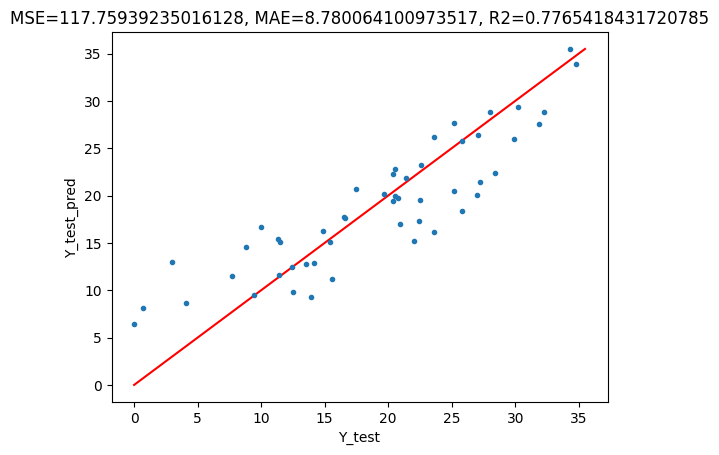

In [ ]:
Y_test_pred = automl.predict(X_test_s)

MSE = np.mean((Y_test - Y_test_pred)**2)
MAE = np.mean(np.abs(Y_test - Y_test_pred))
R2 = r2_score(Y_test, Y_test_pred)

ymax=np.max([Y_test.max(), Y_test_pred.max()])
plt.plot(np.linspace(0,ymax, 3), np.linspace(0, ymax, 3), '-r')
plt.plot(Y_test, Y_test_pred, '.')
plt.xlabel('Y_test')
plt.ylabel('Y_test_pred')
plt.title('MSE='+str(MSE)+', MAE='+str(MAE)+', R2='+str(R2))

In [ ]:
print(automl.leaderboard())

          rank  ensemble_weight           type      cost  duration
model_id                                                          
441          1             0.42  liblinear_svr  0.212924  0.511810
301          2             0.42  liblinear_svr  0.214227  0.693880
166          3             0.16  liblinear_svr  0.218987  0.716337


# Conclusion part 2:

The auto-sklearn produced a model that overperforms the models we fitted in part 1. However, the XGB refressor has a very similar performance on the test set but also performed better on the training set.
